In [198]:
# load required library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import Imputer

In [136]:
air_quality = pd.read_csv('AirQualityUCI_req.csv')
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


# Project Outline

## Descriptive Statistics

### Overview of the Dataset

1. Number of variables

2. Number of observations

3. Memory usage

## Missing Values

1. Visualize missing values using heatmap

2. Suggestions for handling missing value

## Variable Types

1. Print out current data types from Pandas

2. Type conversion suggestions: 

 * String datetime -> datetime
 
 * Small interger (for example: boolean)  -> categorical type
 
 * String float -> float
 
 * Maximum cardinality (number of unique == number of observations) -> remove

## Visualization

In [450]:
class auto_eda():
    def __init__(self, df):
        self.df = df.copy()
        self.num_variables = self.df.shape[0]
        self.num_obs = self.df.shape[1]
        self.memory_usage = str(self.df.memory_usage(deep=True).sum() / 1000000) + ' Mb' # memory in mb
    
    def get_overview(self):
        overview = {}
        overview['Number of Variables:'] = self.num_variables
        overview['Number of Observations:'] = self.num_obs
        overview['Memory Usage:'] = self.memory_usage
        for k,v in overview.items():
            print(k,v)
    
    def get_missings(self, missing_tag = None):
        '''
        Sometimes missing values are denoted with a number or string, 
        enter the missing tag to replace them with NAs
        '''
        if missing_tag is not None:
            self.df.replace(missing_tag, np.nan, inplace = True)
        
        # check if there are any null values
        if self.df.isnull().sum().sum() == 0:
            print('''There is no missing value, please check if the missings have been encoded with non-NAN value.
Use argument missing_tag for encoded missing values''')
        else:
            # missing heatmap display the missing values position in the dataset
            missing_heatmap = plt.figure(1)
            msno.matrix(self.df)
            plt.title('Missing Values shown in White',fontsize=25)

            # correlation plot: how strongly the presence or absence of one variable affects the presence of another
            correlation_plot = plt.figure(2)
            msno.heatmap(self.df,cbar= False)
            plt.title('Missing Values Correlation',fontsize=25)

            # The dendrogram uses a hierarchical clustering algorithm 
            # to bin variables against one another by their missing values correlation 
            missing_dendogram = plt.figure(3)
            msno.dendrogram(self.df)
            plt.title('Missing Values Dendrogram',fontsize=25)
        
    def handle_missings(self, strategy = None):
        '''
        PLEASE RUN get_missings() FIRST TO IDENTIFY MISSINGS.
        
        Handling missing values strategies:
        
        deletion: drop variables with > 70% missing and
        remove observations that contain at least 1 missing value.
        
        encode (Encoding imputation): for numerical variable, encoding missing entries as -999. 
        For categorical variable, encoding missing entries as string "unknown"
        
        mean_mode (Mean/mode imputation): for numerial variable, impute the missing entries with the mean, 
        For categorical variable, impute the missing entries with the mode
        
        '''
        strategies = ['deletion', 'encode', 'mean_mode']
        if self.df.isnull().sum().sum() == 0:
            print('There is no missing value in the dataset')
        elif strategy not in strategies:
            print('No strategy selected, please specify one of the following deletion, encode, or mean_mode')
        else:
            if strategy == 'deletion':
                # drop variable with > 70% missing
                percent_missing = self.df.isnull().sum() * 100 / len(self.df)
                drop_list = percent_missing[percent_missing > 70].index.tolist()
                self.df.drop(drop_list, axis = 1, inplace = True) 
                
                # drop row contains 1 or more missing values
                drop_row_count = self.df.shape[0] - self.df.dropna().shape[0]
                rows_percentage = round(drop_row_count / self.df.shape[0] * 100, 1)
                self.df.dropna(inplace=True)
                
                print('Dropped columns: {}\nNumber of dropped rows: {} --> {}% of rows removed'.format(drop_list, drop_row_count, rows_percentage))
#         imputer = Imputer(missing_values="NaN", strategy="mean")
#         transformed_values = imputer.fit_transform(trainingData[:, 1:2])
        
    

In [451]:
a = auto_eda(air_quality)

In [452]:
a.get_overview()

Number of Variables: 9357
Number of Observations: 15
Memory Usage: 2.20838 Mb


<Figure size 432x288 with 0 Axes>

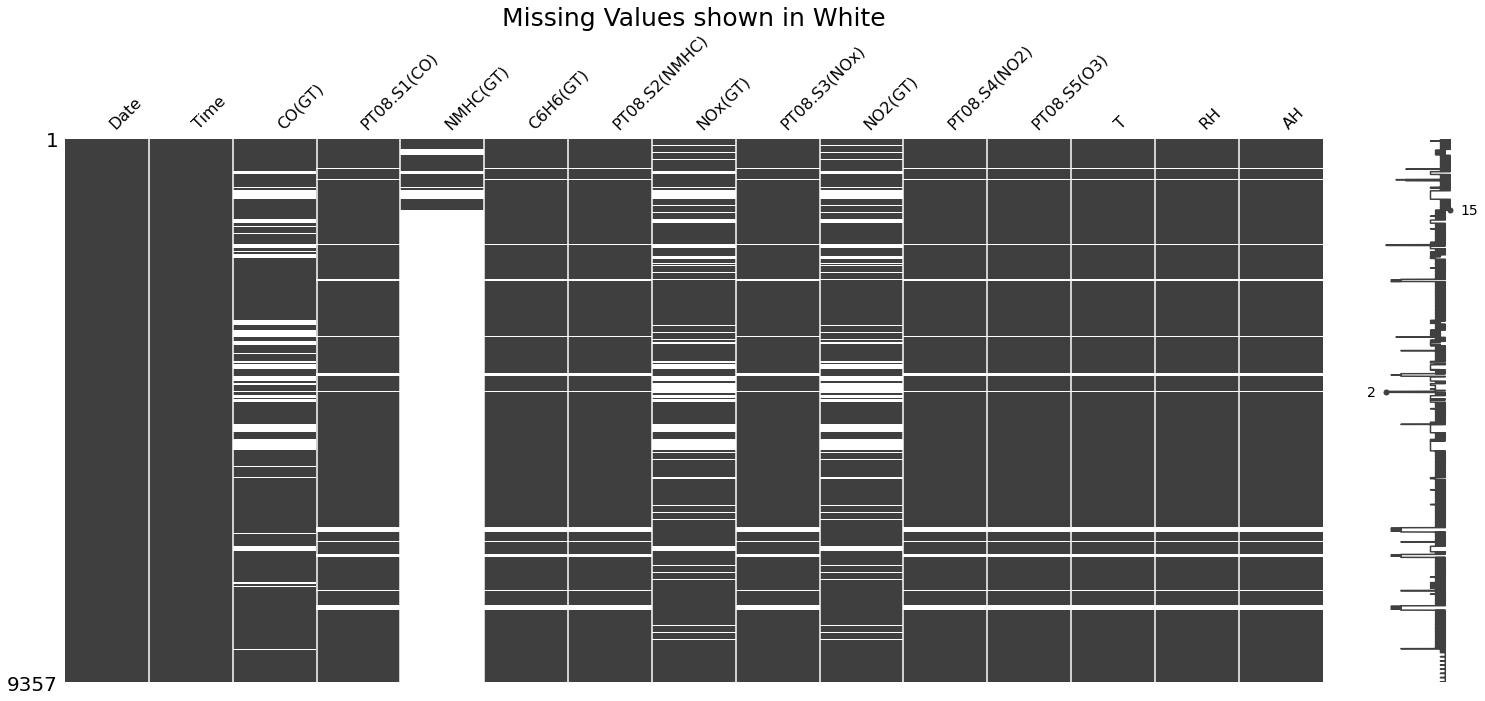

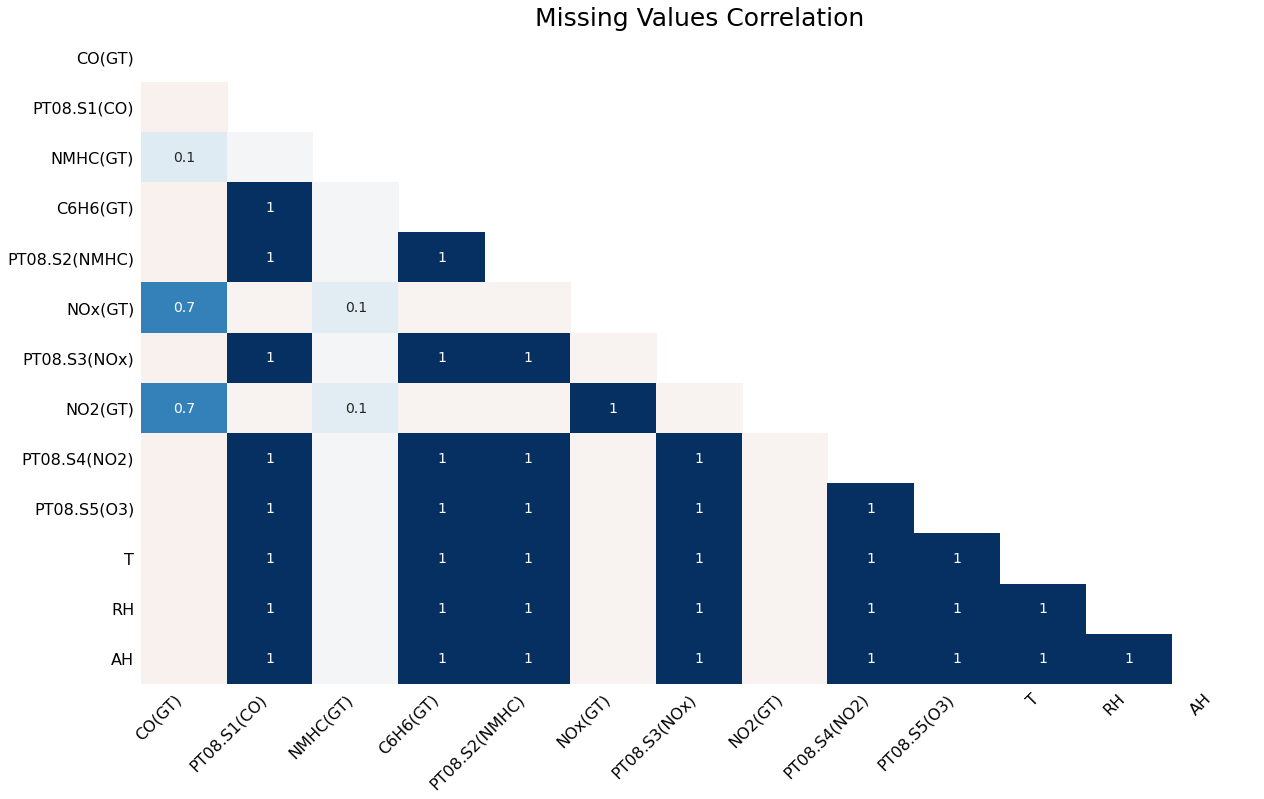

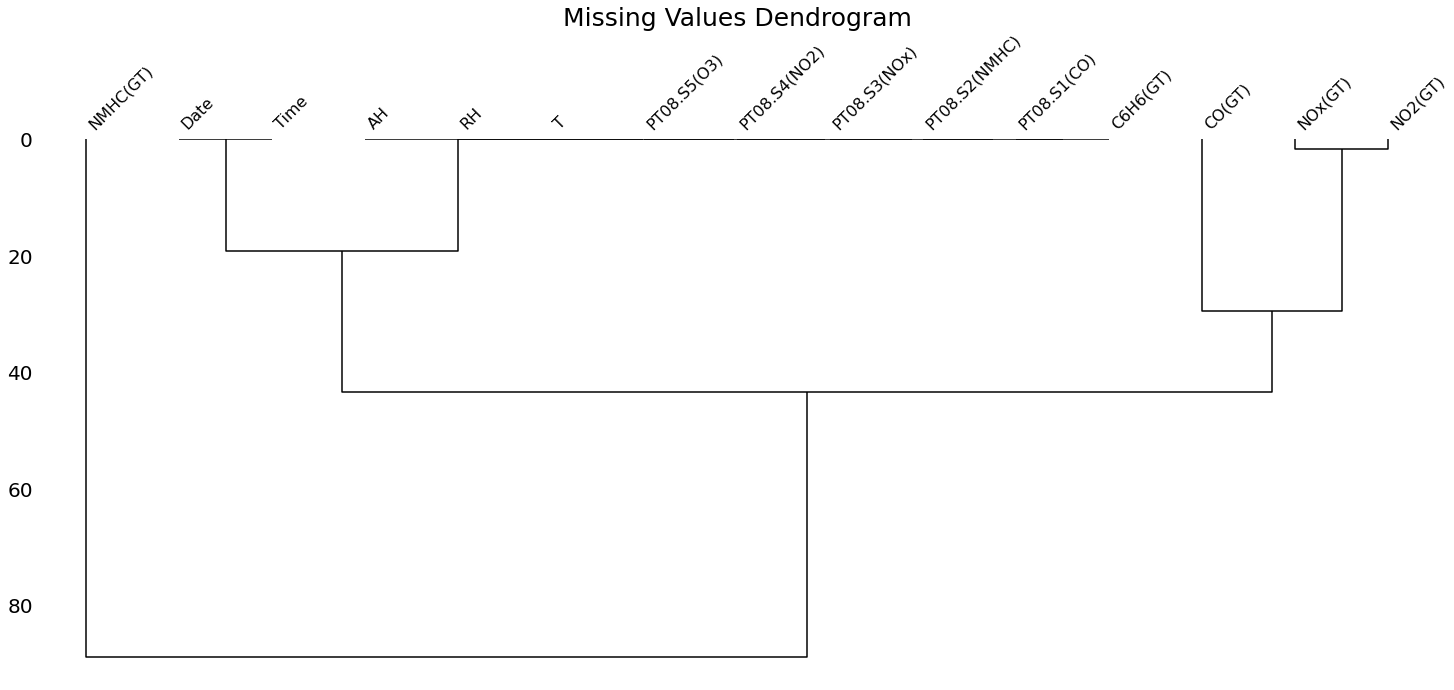

In [453]:
a.get_missings(missing_tag=-200)

In [454]:
a.handle_missings(strategy = 'deletion')

Dropped columns: ['NMHC(GT)']
Number of dropped rows: 2416 --> 25.8% of rows removed


In [455]:
a.get_missings()

There is no missing value, please check if the missings have been encoded with non-NAN value.
Use argument missing_tag for encoded missing values


In [456]:
s = air_quality.replace(-200, np.nan).isnull().sum() * 100 / len(air_quality)
s[s > 70].index.tolist()

['NMHC(GT)']